In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('/Users/dheerajs/Downloads/data.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [8]:
train.groupby('species').size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

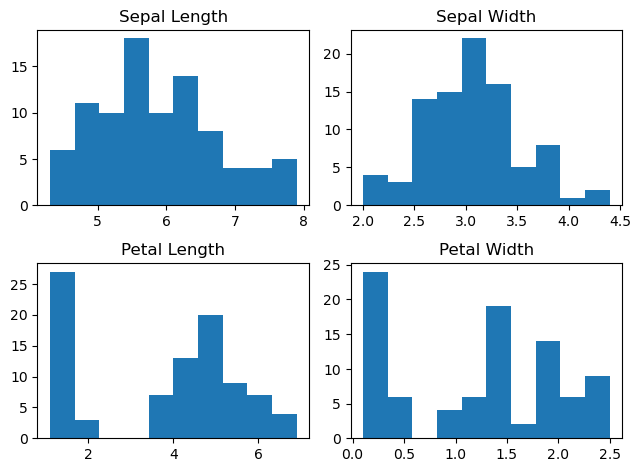

In [9]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

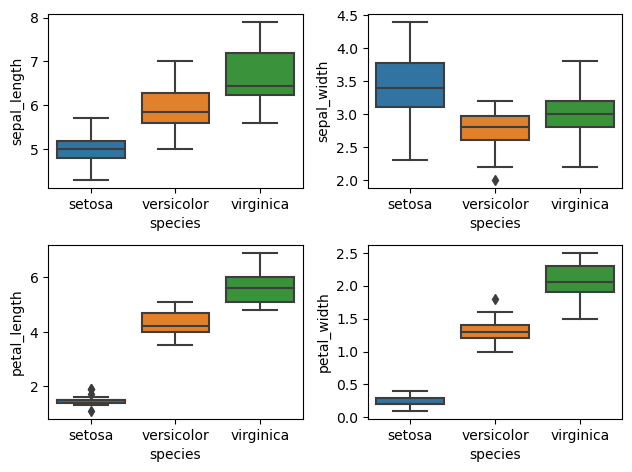

In [10]:
# boxplots using seaborn
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

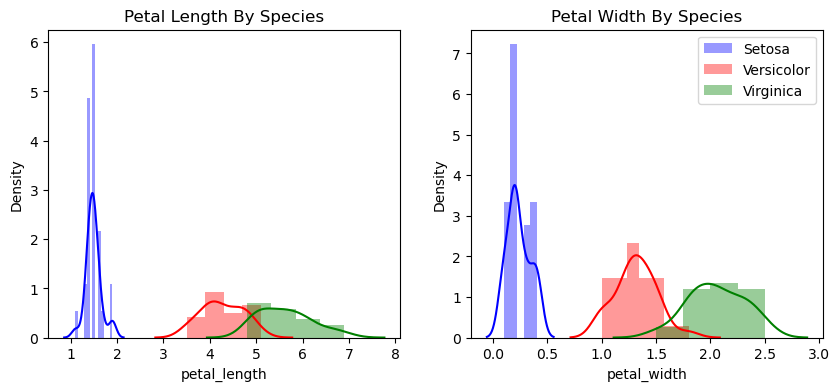

In [11]:
# right off the bat, we see that petal length/width can separate setosa from the others
# histogram by species
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

fig, axs = plt.subplots(1, 2)
# set figure size
fig.set_size_inches(10,4)
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0]);
ax1.set_title('Petal Length By Species')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0]);

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1]);
ax2.set_title('Petal Width By Species')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1]);

plt.legend();

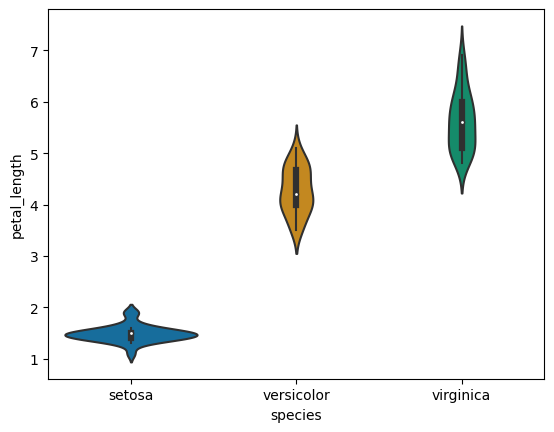

In [12]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

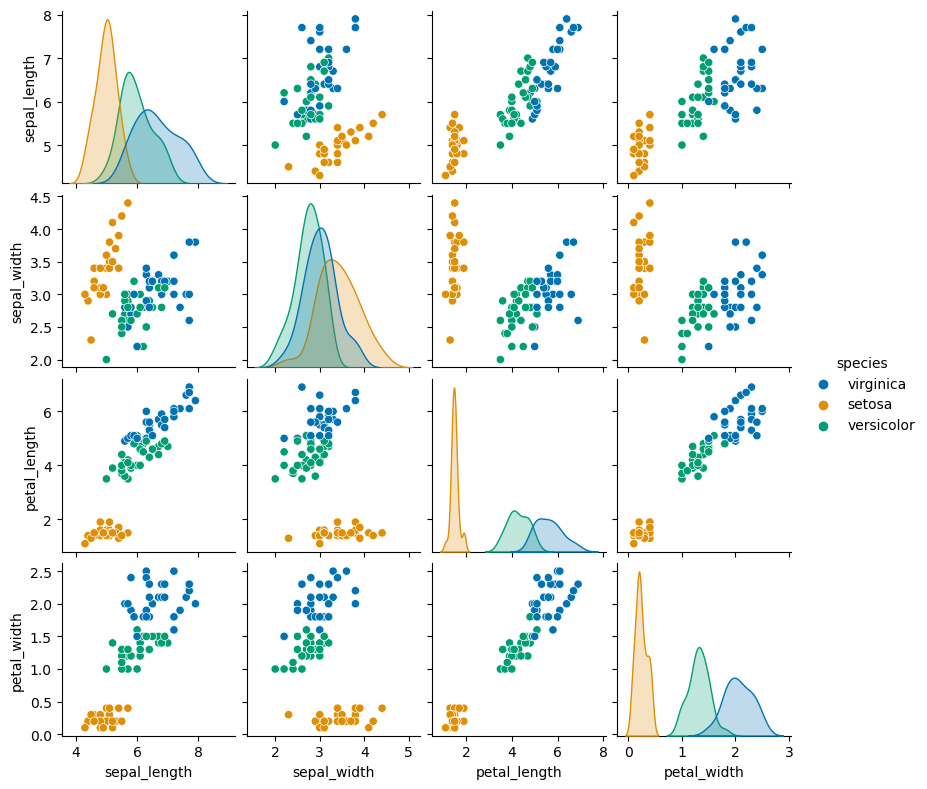

In [13]:
# bivariate relationship
# scatterplot matrix
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

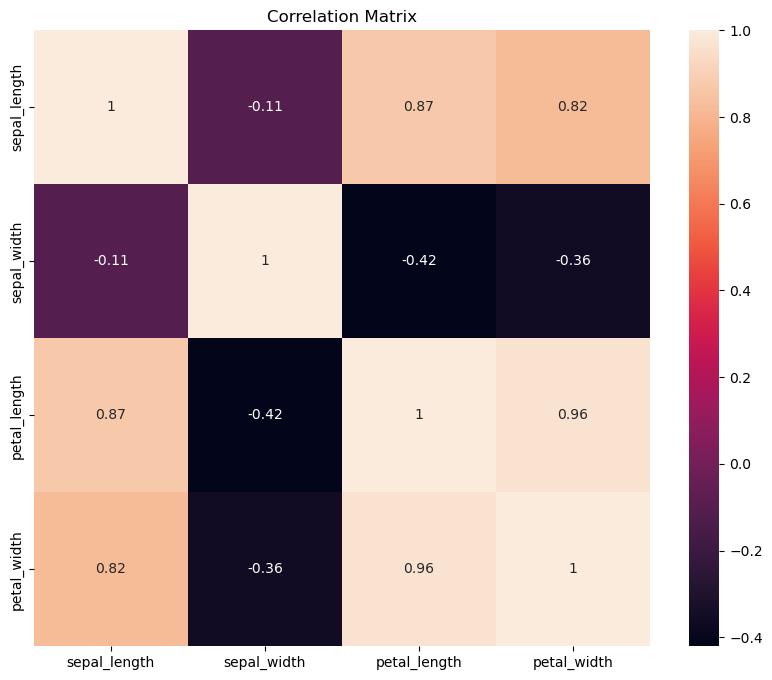

In [14]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corrmat = numeric_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, square=True)
plt.title('Correlation Matrix')
plt.show()

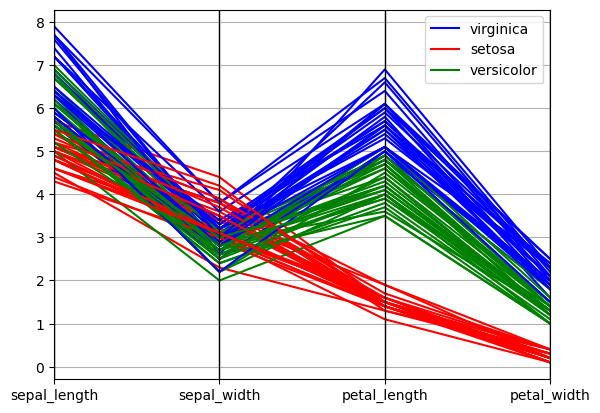

In [15]:
# parallel coordinates
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

In [16]:
# Model development
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [17]:
# first try decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [18]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

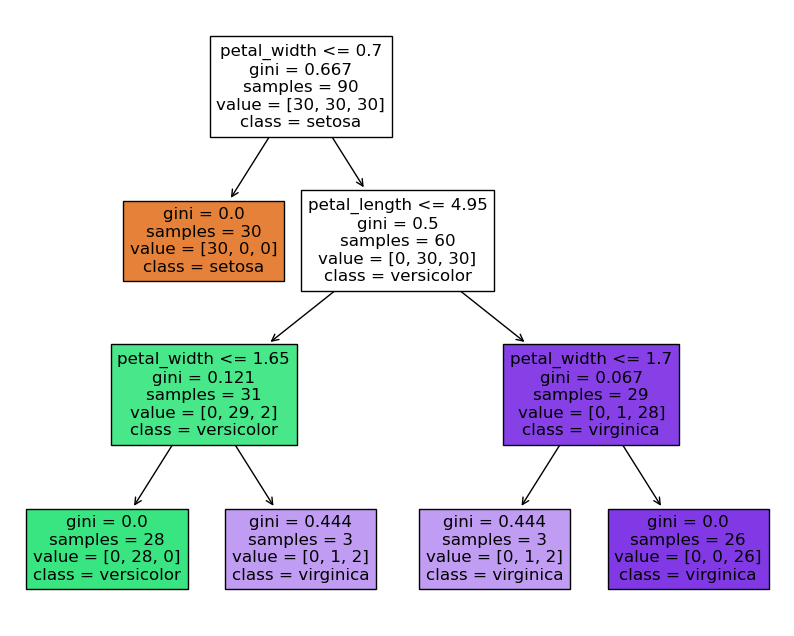

In [19]:
# set figure size
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

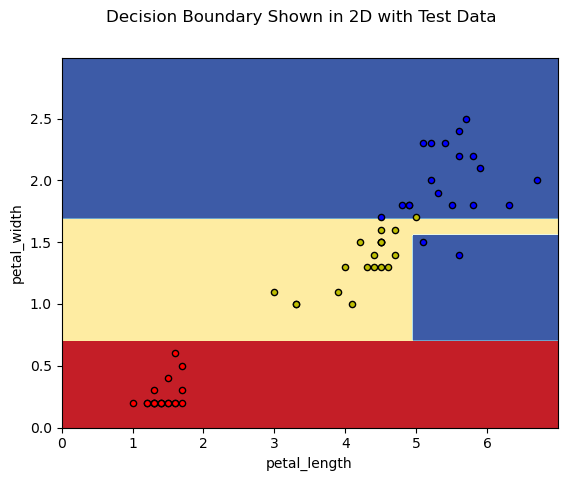

In [20]:
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

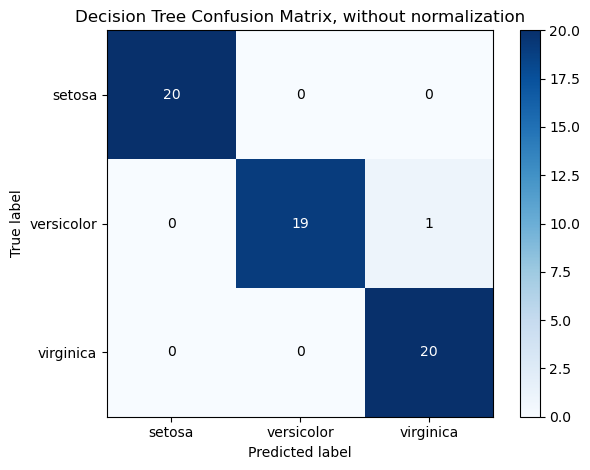

In [21]:
# Plot confusion matrix
y_pred = mod_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix, without normalization')
plt.colorbar()
plt.xticks(range(len(cn)), cn)
plt.yticks(range(len(cn)), cn)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color="white" if cm[i, j] > thresh else "black")
# Show plot
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [22]:
# Guassian Naive Bayes Classifier
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933


In [23]:
# Guassian Naive Bayes Classifier with two predictors
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


In [24]:
# LDA Classifier
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


In [25]:
# LDA Classifier with two predictors
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier with two predictors on test data is 0.933


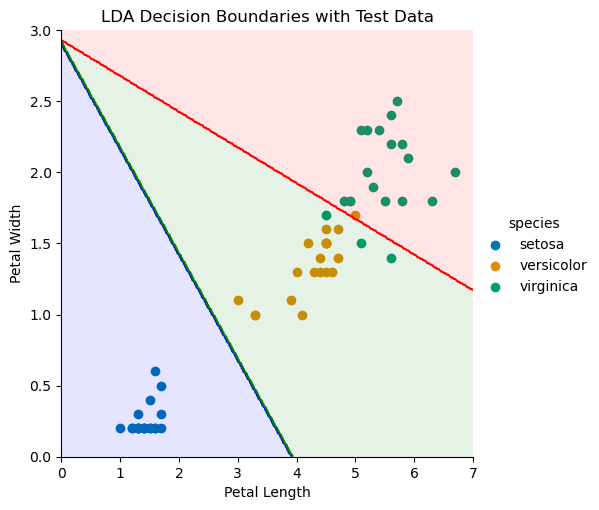

In [26]:
# LDA with 2 predictors
mod_lda_1 = LinearDiscriminantAnalysis()
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train_en).predict(X_test[selected_predictors])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_lda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA Decision Boundaries with Test Data');

In [27]:
# QDA Classifier
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the QDA Classifier is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier is 0.983


In [28]:
# QDA Classifier with two predictors
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the QDA Classifier with two predictors is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier with two predictors is 0.967


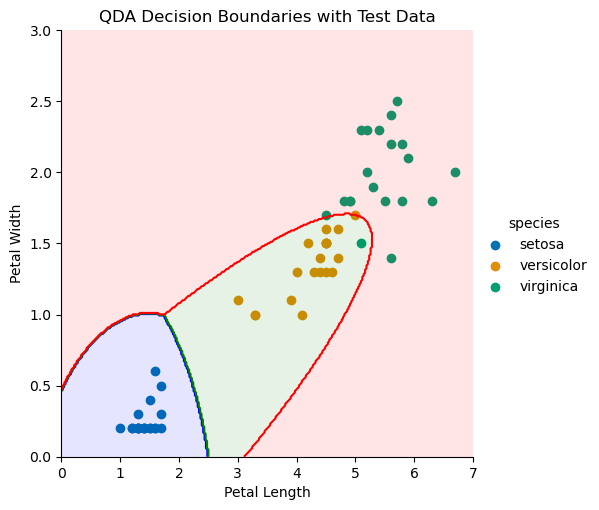

In [29]:
# QDA with 2 predictors
mod_qda_1 = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_1.fit(X_train.iloc[:,2:4], y_train_en).predict(X_test.iloc[:,2:4])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_qda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA Decision Boundaries with Test Data');

In [30]:
# KNN, first try 5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)
prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the 5NN Classifier is 0.933


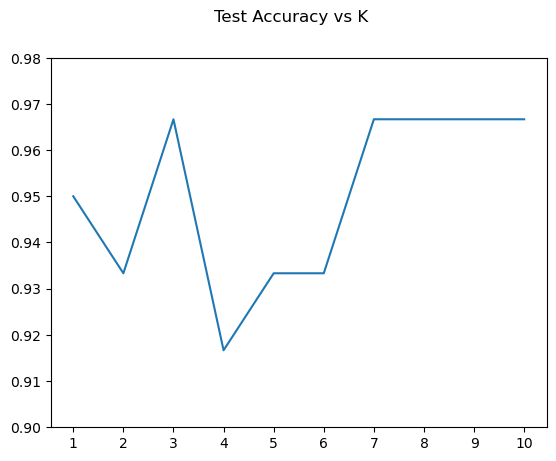

In [31]:
acc_s = pd.Series(dtype='float')
for i in range(1, 11):
    mod_knn = KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train, y_train)
    prediction = mod_knn.predict(X_test)
    acc_s = pd.concat([acc_s, pd.Series(metrics.accuracy_score(prediction, y_test))])

plt.plot(range(1, 11), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(range(1, 11))
plt.ylim(0.9, 0.98)
plt.show()

In [32]:
# SVC with linear kernel
# for SVC, may be impractical beyond tens of thousands of samples
linear_svc = SVC(kernel='linear').fit(X_train, y_train)
prediction=linear_svc.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the linear SVC is 1.000


In [33]:
# SVC with polynomial kernel
poly_svc = SVC(kernel='poly', degree = 4).fit(X_train, y_train)
prediction=poly_svc.predict(X_test)
print('The accuracy of the Poly SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Poly SVC is 0.933


In [34]:
# Logistic regression
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
prediction=mod_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Logistic Regression is 0.950


In [35]:
# Read the data
data = pd.read_csv('/Users/dheerajs/Downloads/data.csv')

# Encode target variable 'species' using one-hot encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['species'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Split the data into features (X) and target (y)
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = onehot_encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

NameError: name 'LabelEncoder' is not defined

In [36]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dummy classifier that predicts classes randomly
dummy_classifier = DummyClassifier(strategy="uniform", random_state=42)

# Train the dummy classifier
dummy_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dummy_classifier.predict(X_test)

# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.475


In [37]:
# Baseline accuracy
baseline_accuracy = 0.475

# Accuracy achieved by the neural network model
model_accuracy = 0.9333333373069763

# Comparing with baseline accuracy
if model_accuracy > baseline_accuracy:
    print("The neural network model outperforms the baseline accuracy.")
elif model_accuracy == baseline_accuracy:
    print("The neural network model performs as well as the baseline accuracy.")
else:
    print("The neural network model does not outperform the baseline accuracy.")


The neural network model outperforms the baseline accuracy.
